In [1]:
(11 - 1) % 4 + 1

3

# Task 3
Написать программу, которая находит интерполяционный многочлен для заданной функции по значениям в чебышёвских узлах.

Требования к программе:

- Программа должна принимать на вход: ссылку на функцию $f$ (lambda функцию в Питоне); интервал, на котором нужно найти интерполяционный многочлен $[x_l,x_r]$; количество узлов $n$.
- Программа должна вычислять ошибку интерполяции в норме $||·||^\infty$. Для этого нужно вычислить значения исходной функции и интерполяционного многочлена в большом количестве точек ($\sim$ 1000), и найти максимум модулей разностей.
- Программа должна строить график исходной функции и интерполяционного многочлена.
- Программа должна содержать подробные комментарии с пояснениями и основными формулами.


### Implementation

In [83]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
class interpolation_polynom:
    '''Computes interpolation using Lagrange polynoms and Chebyshev nodes.'''
    def __init__(self, f, bounds, n_nodes):
        ''' 
        Args: 
            f: function to interpolate.
            bounds: (x_l, x_r) limits for interpolation.
            n_nodes: number of Chebyshev nodes to compute interpolation.
        '''
        self.f = f
        self.bounds = bounds
        self.n_nodes = n_nodes
        self.error = np.inf
        
    def fit(self, plot=False):
        '''Find nodes for interpolation and compute values of f for given nodes.

        Args:
            plot: builds plots of original and interpolated function if plot=true.
        '''
        self.nodes = self._find_roots()
        self.values = np.array([self.f(x) for x in self.nodes])
        self._comute_error()
        if plot:
            print('error ', self.error)
            self._build_plot()
        
    def get_interpolation_value(self, x):
        '''Computes interpolated value for given input x.'''
        return self._get_Lagrange_polynomials(x)

    def _get_Lagrange_polynomials(self, x):
        '''Computes Lagrange polynomials for given x.
        https://en.wikipedia.org/wiki/Lagrange_polynomial    
        '''       
        summ = 0
        for i in range(len(self.nodes)):
            prod = 1
            for j in range(len(self.nodes)):
                if j == i:
                    continue
                prod *= (x - self.nodes[j]) / (self.nodes[i] - self.nodes[j])
            summ += prod * self.values[i]
        return summ
    
    def _find_roots(self):
        '''Computes Chebyshev nodes as (a + b)/2 + (b - a)/2 * cos(PI * 2M-1/2N)'''
        M = np.arange(1,self.n_nodes+1)
        a,b = self.bounds[0], self.bounds[1]
        nodes = (a + b)/2.0 + (b - a)/2.0 * np.cos((2.0*M - 1) / (2.0 * self.n_nodes) * np.pi)
        return nodes
    
    def _comute_error(self, n = 1000):
        '''Computes error as max{|f(x) - P(x)|} on uniform grid.'''
        step = (self.bounds[1] - self.bounds[0]) / n
        X = np.arange(self.bounds[0],self.bounds[1] + step, step)
        values = np.array([self.f(x) for x in X])
        interpolated = np.array([self._get_Lagrange_polynomials(x) for x in X])
        self.error = np.max(np.abs(values - interpolated))
    
    def _build_plot(self, grid_size=100):
        plt.figure(figsize=(15,10))
        plt.grid(True)
        step = (self.bounds[1] - self.bounds[0]) / grid_size
        X = np.arange(self.bounds[0],self.bounds[1] + step, step)
        plt.plot(X,[self.f(x) for x in X],'-', color='green', label='f(x)')
        plt.plot(X,[self._get_Lagrange_polynomials(x) for x in X], '--', color='red',label='Lagrange interpolation')
        plt.plot(self.nodes, self.values, 'o', color='black')
        plt.legend(loc='best',  prop={'size': 10})
        plt.show()

###  Run tests

In [86]:
# functions to interpolate 
def fsin(x):
    return np.sin(x)
def fx20(x):
    return x**3
def fxmin3(x):
    return (x + 15)**-3

random_values = np.random.randint(0,100,30)
def frand(x):
    return random_values[int(x) + 15]

error  0.416934953326


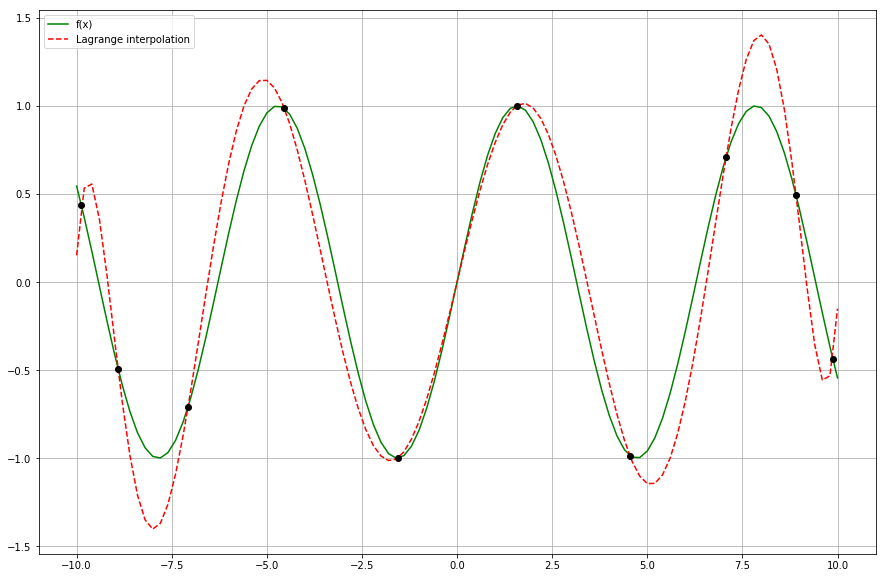

In [87]:
interpolator = interpolation_polynom(fsin,(-10,10), 10)
interpolator.fit(plot=True)

error  84.7455458267


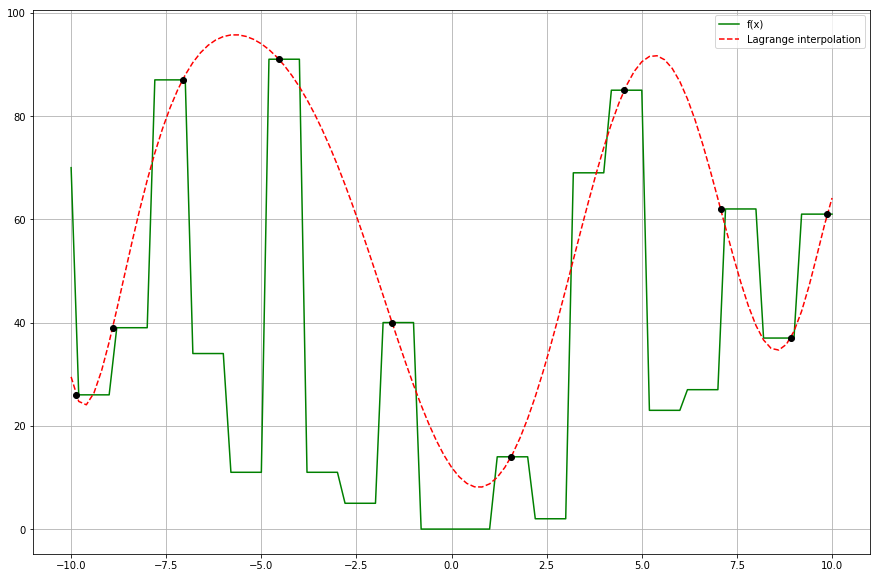

In [88]:
interpolator = interpolation_polynom(frand,(-10,10), 10)
interpolator.fit(plot=True)

100%|██████████| 28/28 [00:06<00:00,  1.96it/s]


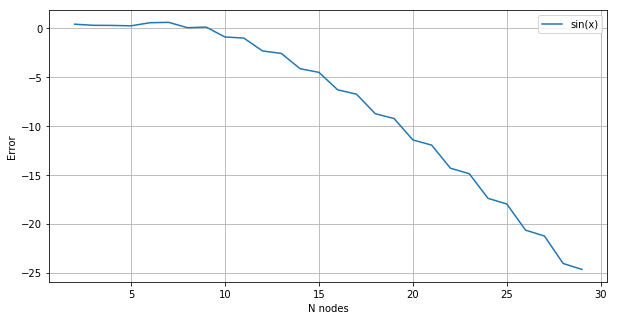

100%|██████████| 28/28 [00:07<00:00,  1.87it/s]


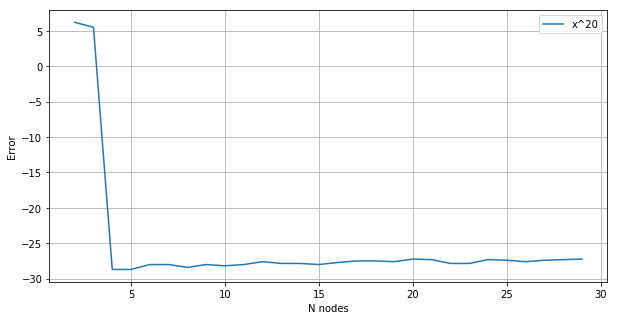

100%|██████████| 28/28 [00:07<00:00,  1.79it/s]


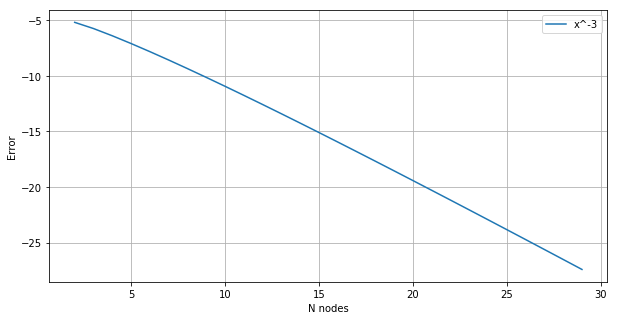

100%|██████████| 28/28 [00:06<00:00,  1.98it/s]


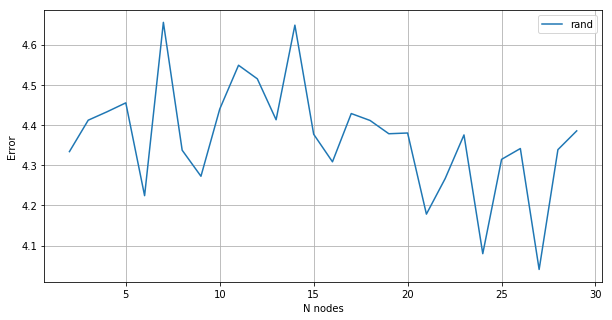

In [89]:
from tqdm import tqdm
functions = [fsin,fx20,fxmin3, frand]
fnames = ['sin(x)', 'x^20', 'x^-3', 'rand']
errors_all = []

N = np.arange(2,30,1)
for f,name in zip(functions, fnames):
    interpolators = [interpolation_polynom(f,(-10,10), n) for n in N]
    errors= []
    for alg in tqdm(interpolators,position=0):
            alg.fit(plot=False)
            errors.append(alg.error)
    errors_all.append(errors)
    plt.figure(figsize=(10,5))
    plt.grid(True)
    plt.xlabel('N nodes')
    plt.ylabel('Error')
    plt.plot(N, np.log(errors), label=name)
    plt.legend(loc='best')
    plt.show()
